In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import warnings 
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('Titanic-Dataset.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.size

10692

In [21]:
df.shape

(891, 12)

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
df.duplicated().sum()

0

Checking and Handeling Null values

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [30]:
df['Cabin'] = df['Cabin'].ffill()

In [31]:
df['Embarked'] = df['Embarked'].bfill()

In [32]:
df.dropna(inplace = True)

In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

        PREDICTION

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df['Sex'].value_counts()

Sex
male      576
female    314
Name: count, dtype: int64

In [36]:
df['Sex'] = le.fit_transform(df["Sex"])

In [37]:
x = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

In [38]:
y.value_counts()

Survived
0    548
1    342
Name: count, dtype: int64

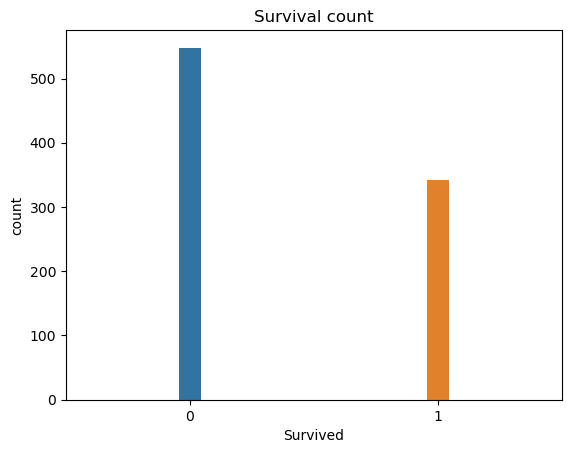

In [39]:
plt.title('Survival count')
sns.countplot(x = y,width = 0.09);

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [42]:
y_pred = dt.predict(x)

In [44]:
df1 = pd.DataFrame({"Survived":y,"Survivied Prediction":y_pred})
df1.head(20)

,Survived,Survivied Prediction
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1
10,1,1


        MODEL EVALUATION

In [46]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y, y_pred)

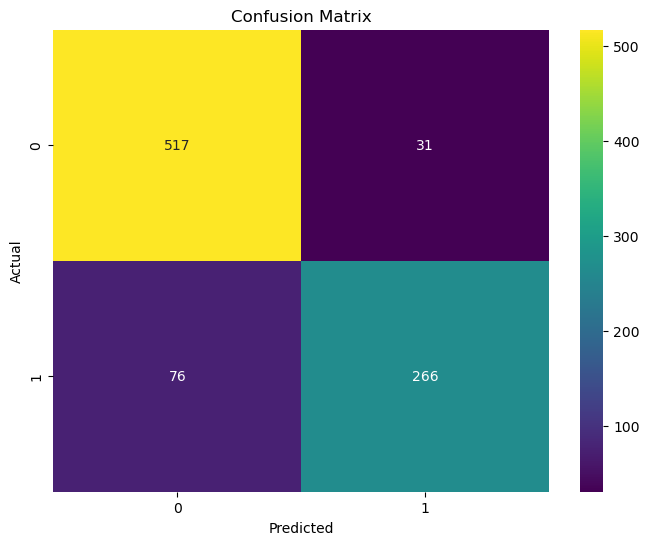

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       548
           1       0.90      0.78      0.83       342

    accuracy                           0.88       890
   macro avg       0.88      0.86      0.87       890
weighted avg       0.88      0.88      0.88       890



In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8797752808988764

        Exploratory Data Analysis (EDA)

In [50]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,C123,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,E46,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.000000,1,1,PP 9549,16.7000,G6,S


Sex
1    576
0    314
Name: count, dtype: int64


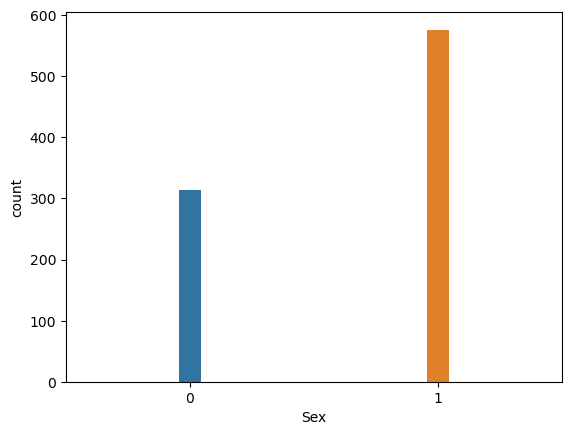

In [52]:
print(df['Sex'].value_counts())
sns.countplot(x = df['Sex'],width = 0.09);
# [male = 0, female = 1]

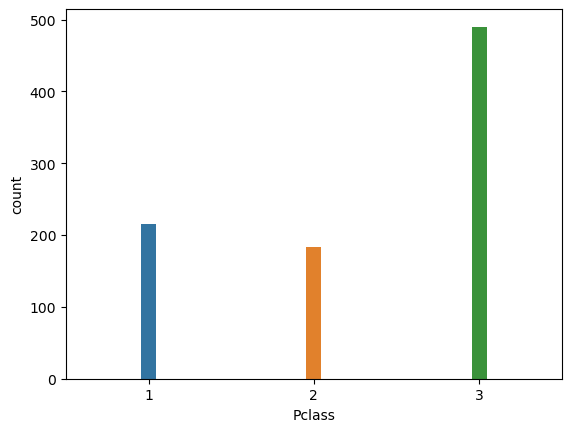

In [53]:
sns.countplot(x = df['Pclass'],width= 0.09);

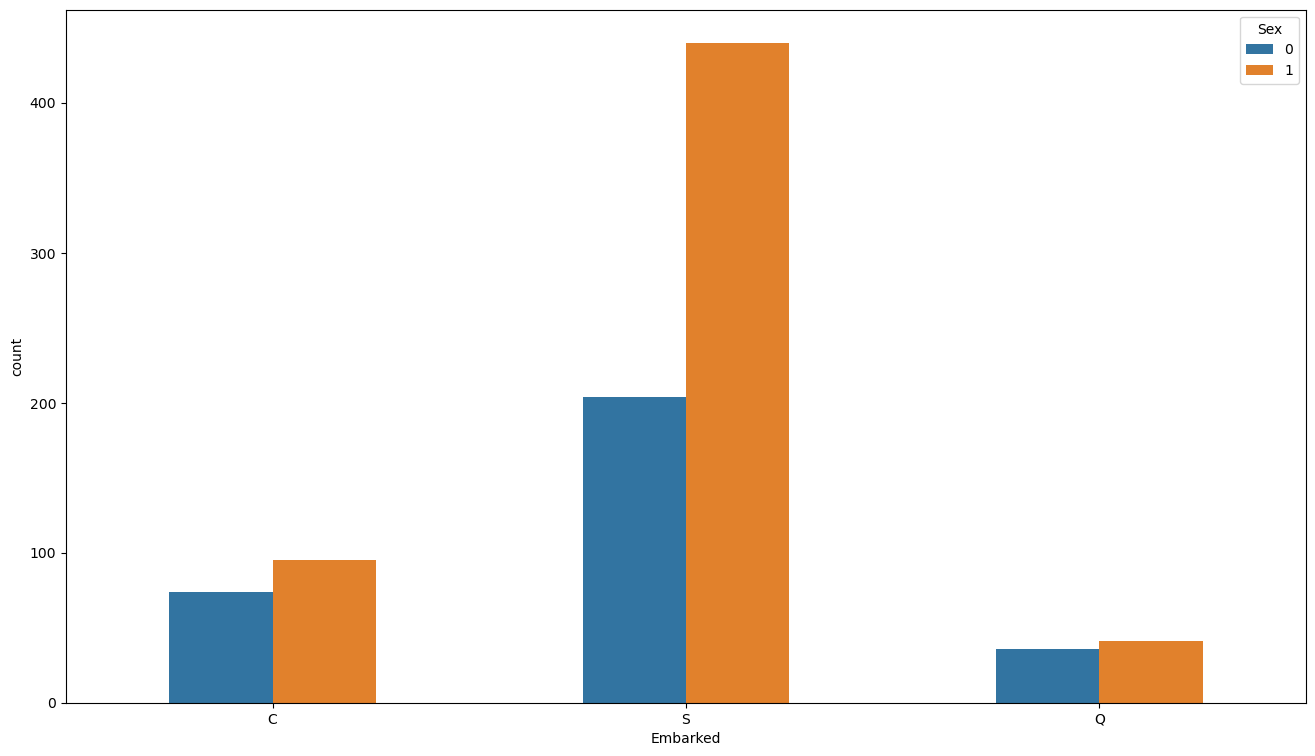

In [54]:
plt.figure(figsize =(16,9))
sns.countplot(df,x = "Embarked",width = 0.5,hue = "Sex");

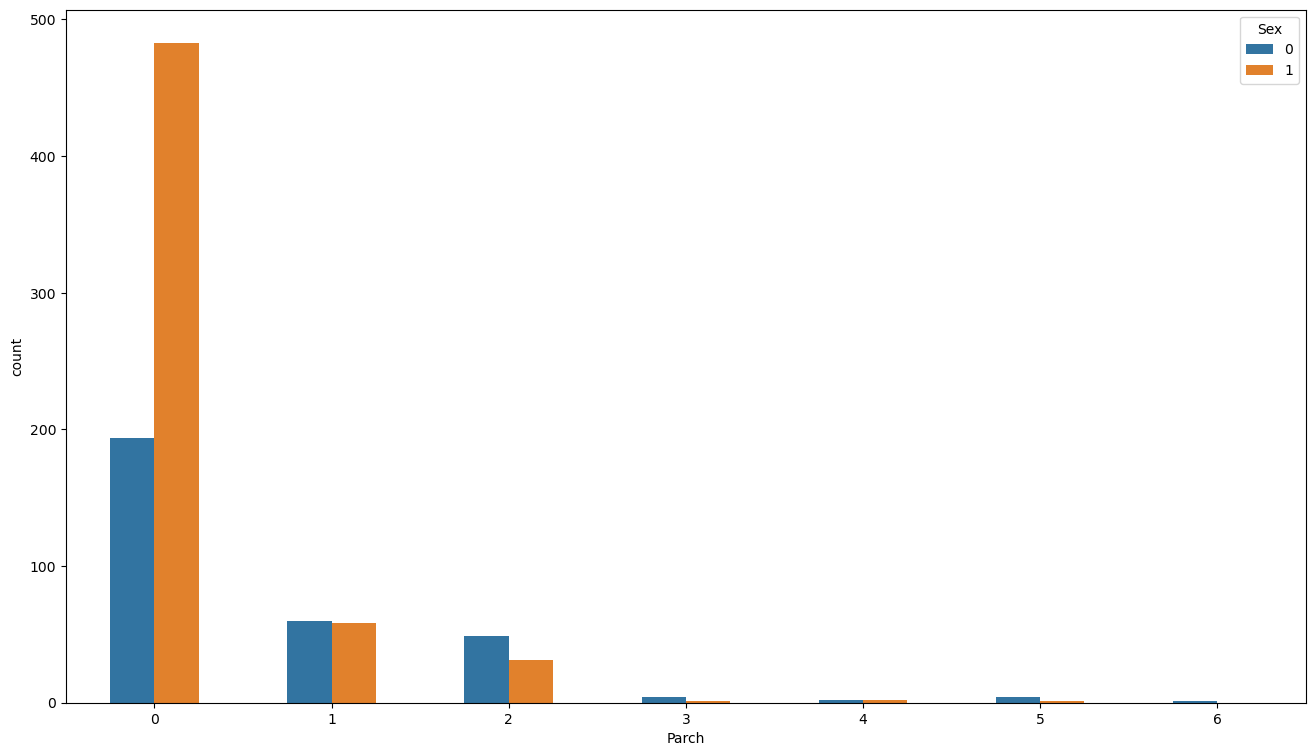

In [55]:
plt.figure(figsize =(16,9))
sns.countplot(df,x = "Parch",width = 0.5,hue = "Sex");

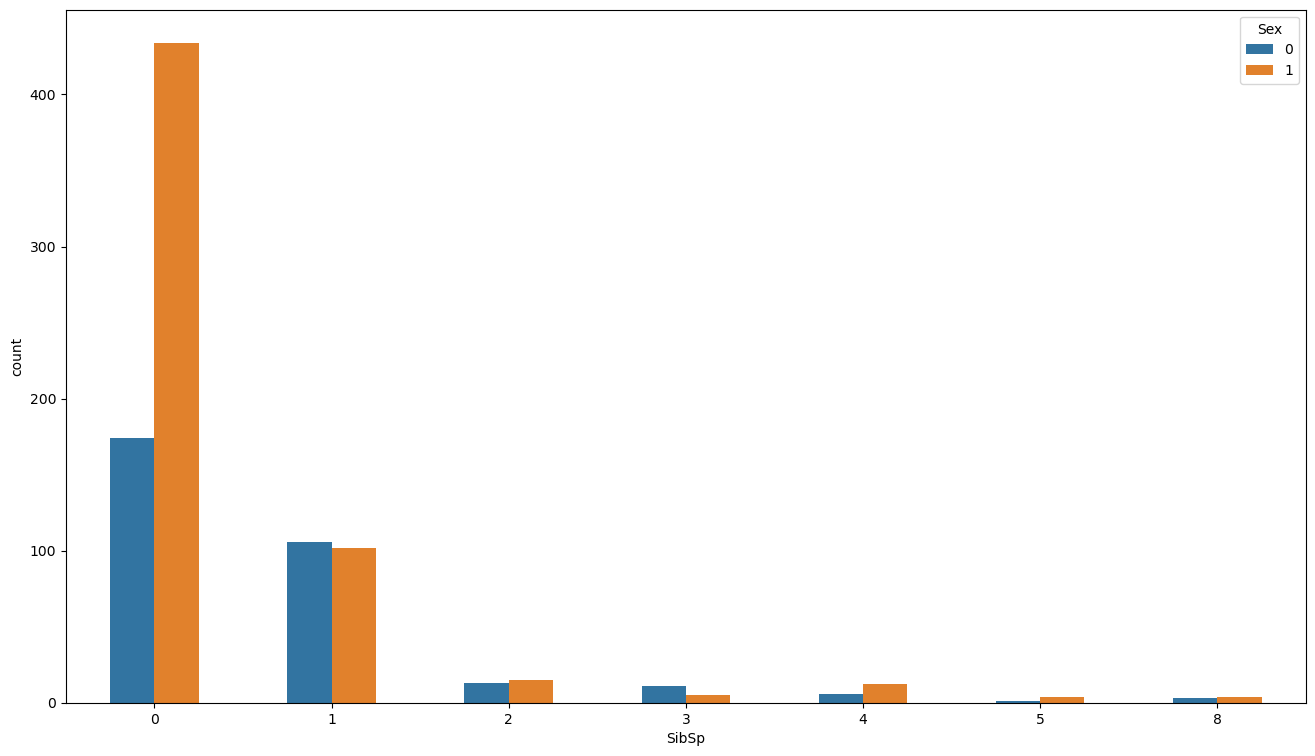

In [56]:
plt.figure(figsize =(16,9))
sns.countplot(df,x = "SibSp",width = 0.5,hue = "Sex");

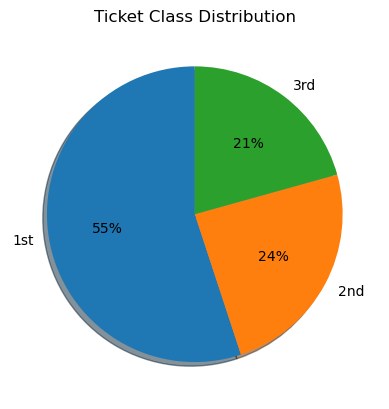

In [57]:
a,b,c = df['Pclass'].value_counts()
x = [a,b,c]
l =  ['1st','2nd','3rd']
plt.title('Ticket Class Distribution')
plt.pie(x,labels =l,autopct = "%.f%%",labeldistance = 1.1,shadow = True,startangle = 90);

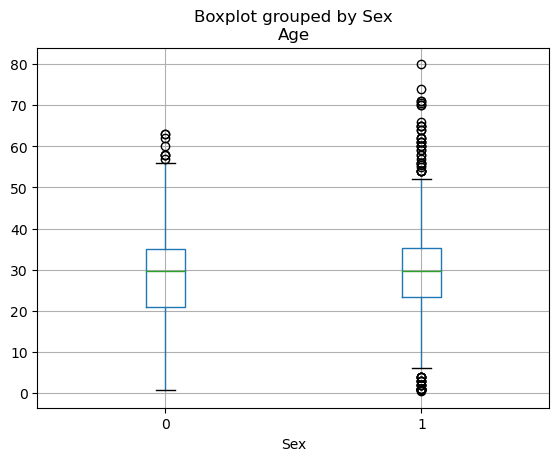

In [58]:
df.boxplot(column='Age', by='Sex');

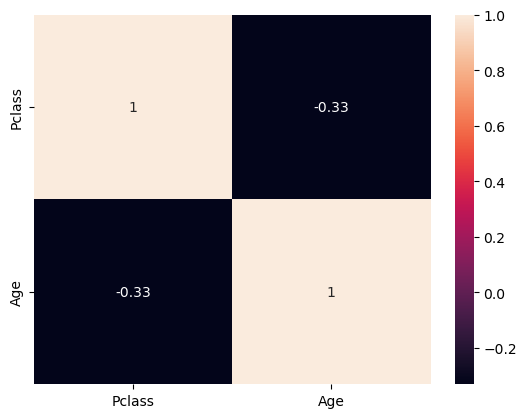

In [59]:
sns.heatmap(df[['Pclass', 'Age']].corr(), annot=True);

<Axes: xlabel='Age', ylabel='Count'>

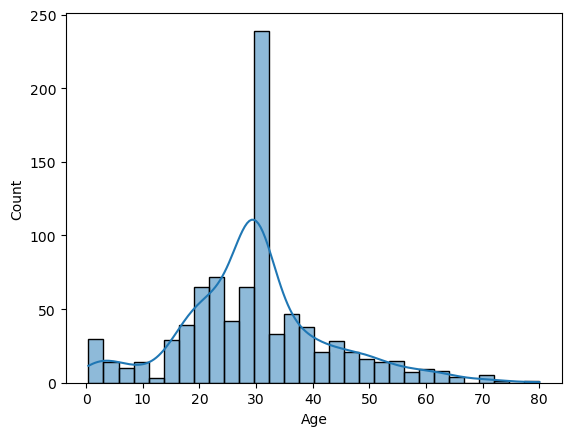

In [60]:
sns.histplot(df['Age'], kde=True)

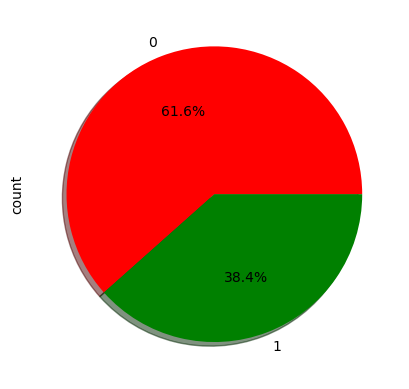

In [61]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['Red', 'green'],shadow = True);

<Axes: xlabel='Age', ylabel='Count'>

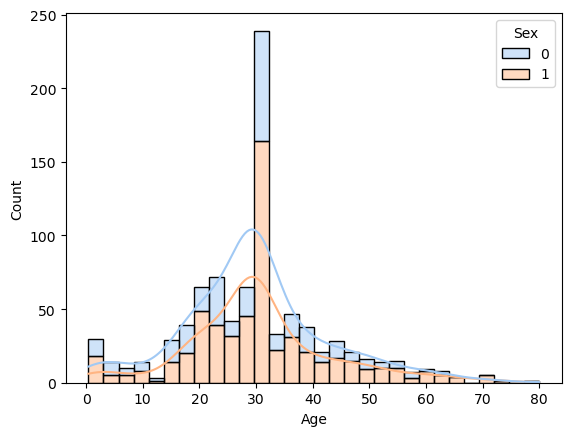

In [62]:
sns.histplot(df, x='Age', hue='Sex', multiple='stack', palette='pastel', kde=True)

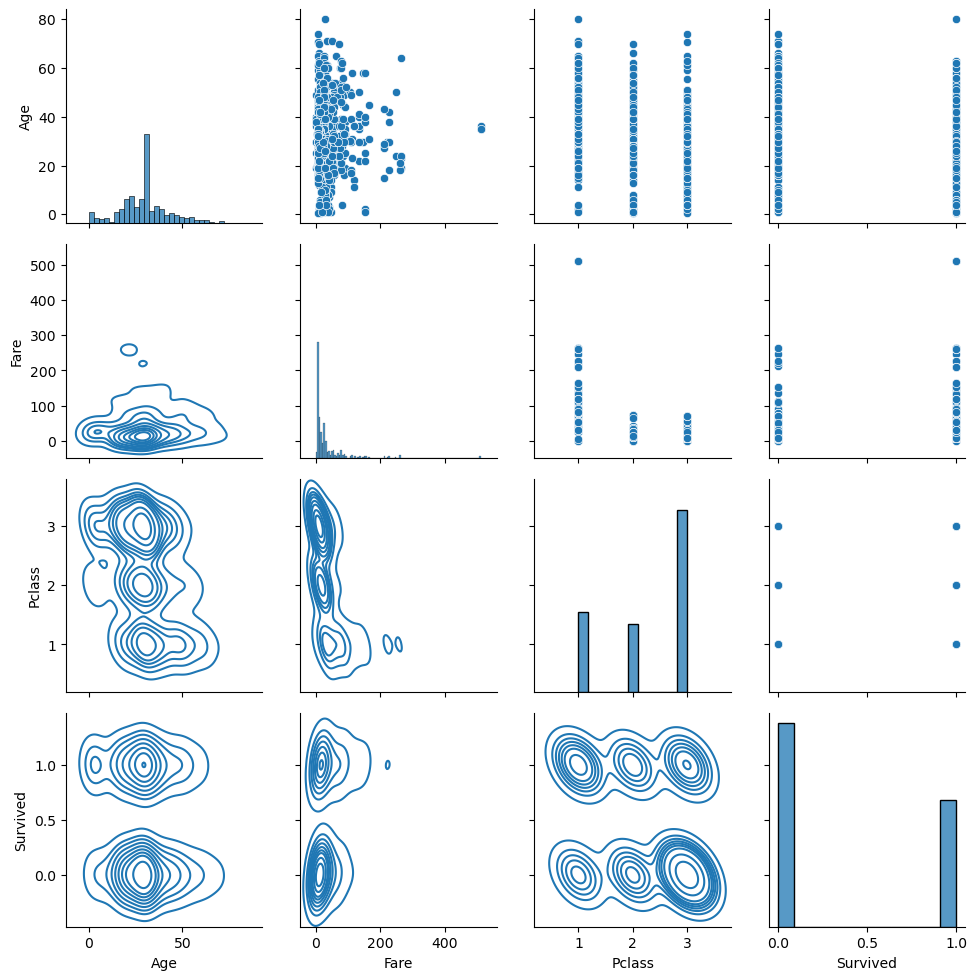

In [63]:
g = sns.PairGrid(df[['Age', 'Fare', 'Pclass', 'Survived']]);
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)